<a href="https://colab.research.google.com/github/SHALINI12CS/NM-AI/blob/main/House_Price_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('USA_Housing.csv')

In [ ]:
dataset.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


Data cleaning techniques

In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
# Categorical columns
cat_col = [col for col in dataset.columns if dataset[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in dataset.columns if dataset[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Address']
Numerical columns : ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [ ]:
dataset[cat_col].nunique()

Address    5000
dtype: int64

In [ ]:
round((dataset.isnull().sum()/dataset.shape[0])*100,2)

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

<Figure size 1200x800 with 0 Axes>

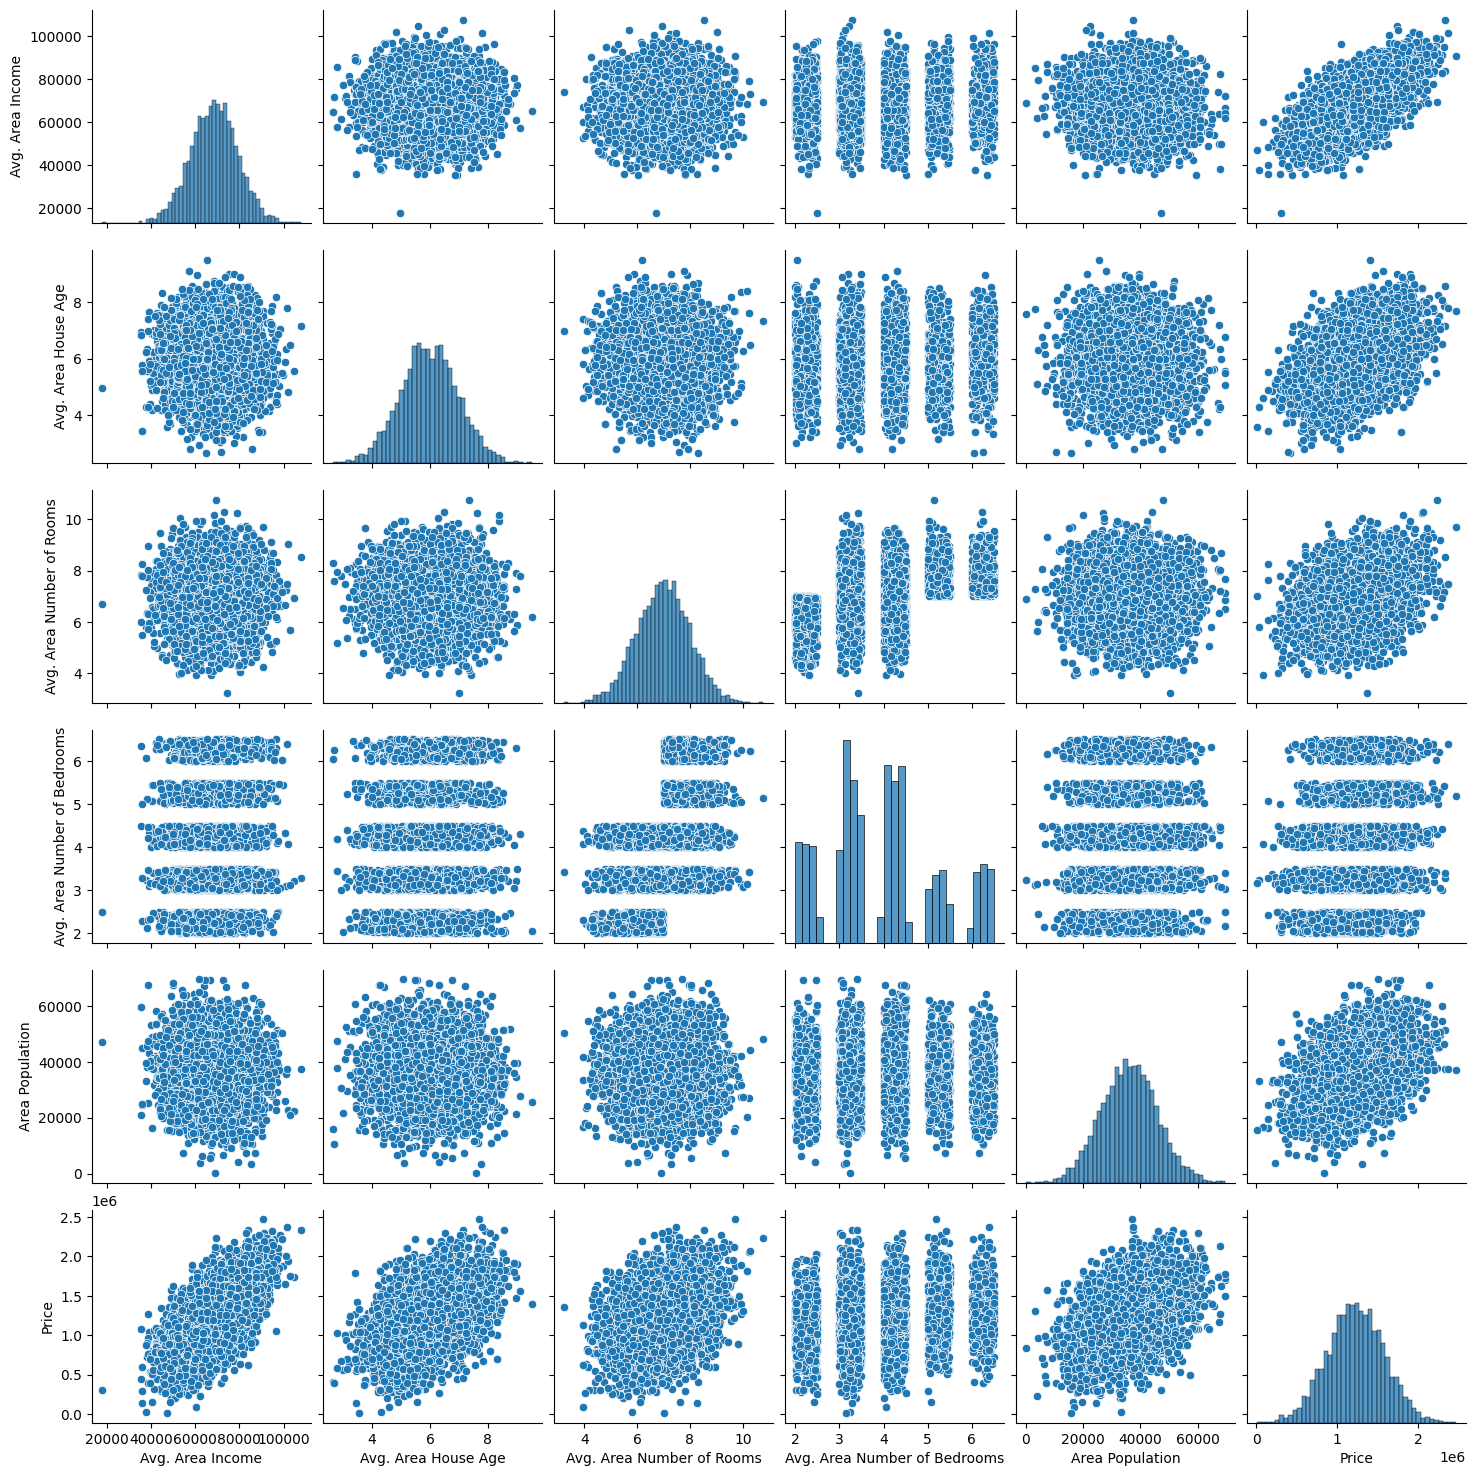

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)

In [ ]:
Data analysis techniques

In [ ]:
def mean(df):
    return sum(dataset.Price)/len(dataset)
print(mean(dataset))


1232072.6541452995


In [ ]:
median_value = np.median(dataset['Price'])
print(median_value)

1232669.378


In [ ]:
import statistics
mode_result = statistics.mode(dataset['Price'])

print(f'Mode: {mode_result}')

Mode: 1059033.558


In [ ]:
std_deviation = np.std(dataset['Price'])
print(f"Standard Deviation: {std_deviation}")

Standard Deviation: 353082.3130552725


In [ ]:
percentiles = np.percentile(dataset['Price'], [25, 50, 75])
print(f"25th Percentile (Q1): {percentiles[0]}")
print(f"50th Percentile (Q2 or Median): {percentiles[1]}")
print(f"75th Percentile (Q3): {percentiles[2]}")

25th Percentile (Q1): 997577.135075
50th Percentile (Q2 or Median): 1232669.378
75th Percentile (Q3): 1471210.2045


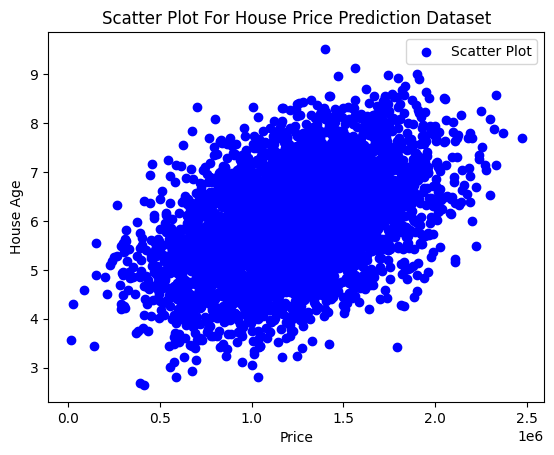

In [ ]:
x_values = dataset['Price']
y_values = dataset['Avg. Area House Age']

plt.scatter(x_values, y_values, c='blue', label='Scatter Plot')
plt.title('Scatter Plot For House Price Prediction Dataset')
plt.xlabel('Price')
plt.ylabel('House Age')
plt.legend()
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

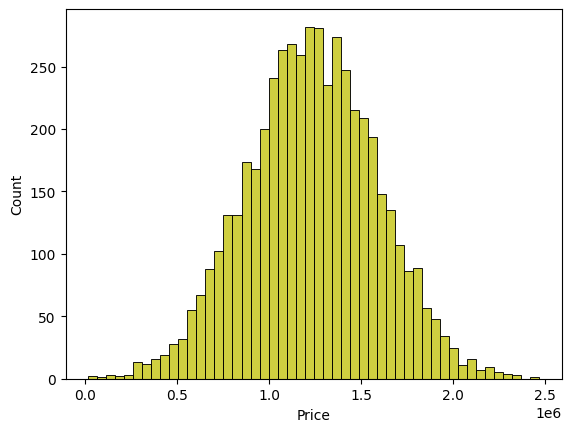

In [ ]:
sns.histplot(dataset, x='Price', bins=50, color='y')

Data Preprocessing Techniques

In [ ]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y = dataset['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
Y_train.head()

3413    1305210.265
1610    1400961.279
3459    1048639.789
4293    1231157.255
1039    1391232.527
Name: Price, dtype: float64

In [ ]:
Y_train.shape

(4000,)

In [ ]:
Y_test.head()

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

In [ ]:
Y_test.shape

(1000,)

In [ ]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr=LinearRegression()

In [ ]:
model_lr.fit(X_train_scal, Y_train)

LinearRegression()

In [ ]:
Prediction1 = model_lr.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

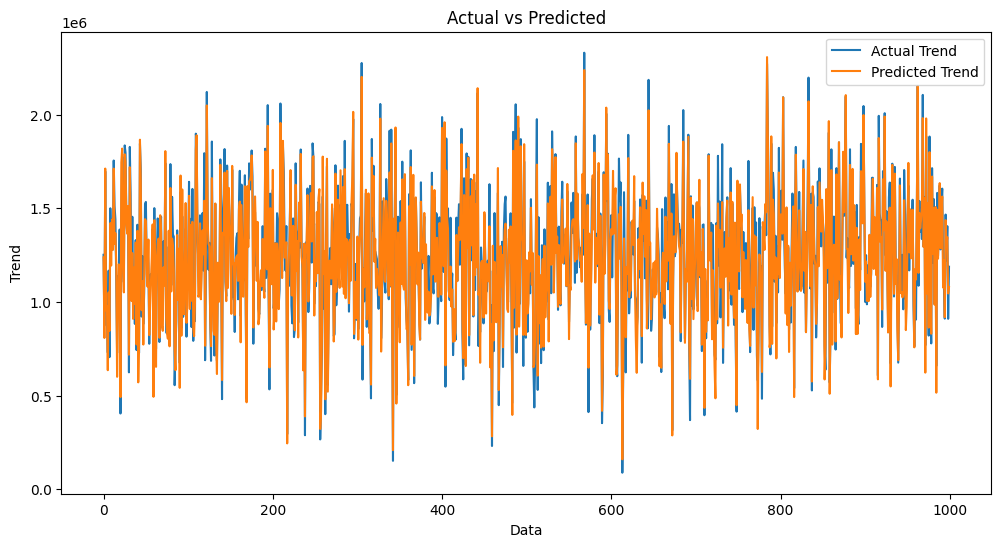

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
plt.plot(np.arange(len(Y_test)), Prediction1, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

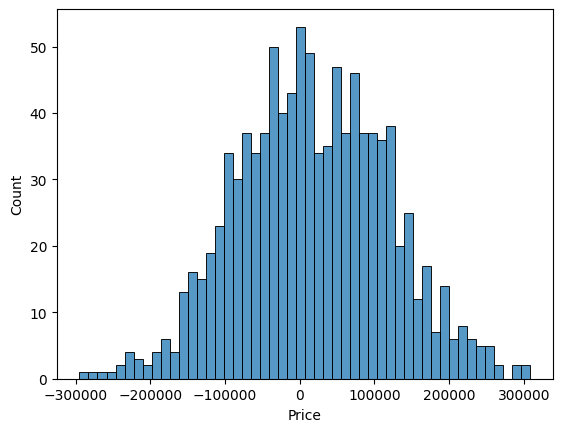

In [ ]:
sns.histplot((Y_test-Prediction1), bins=50)

In [ ]:
print(r2_score(Y_test, Prediction1))
print(mean_absolute_error(Y_test, Prediction1))
print(mean_squared_error(Y_test, Prediction1))

0.9182928179527469
82295.49777553751
10469084771.329184


In [ ]:
from sklearn.svm import SVR

In [ ]:
model_svr = SVR()

In [ ]:
model_svr.fit(X_train_scal, Y_train)

SVR()

In [ ]:
Prediction2 = model_svr.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

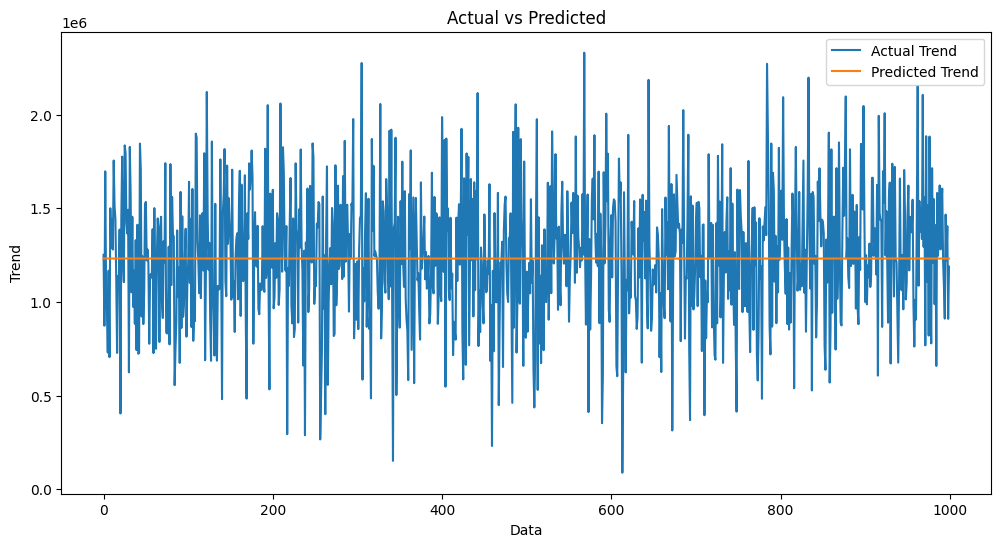

In [ ]:
 plt.figure(figsize=(12,6))
 plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
 plt.plot(np.arange(len(Y_test)), Prediction2, label='Predicted Trend')
 plt.xlabel('Data')
 plt.ylabel('Trend')
 plt.legend()
 plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

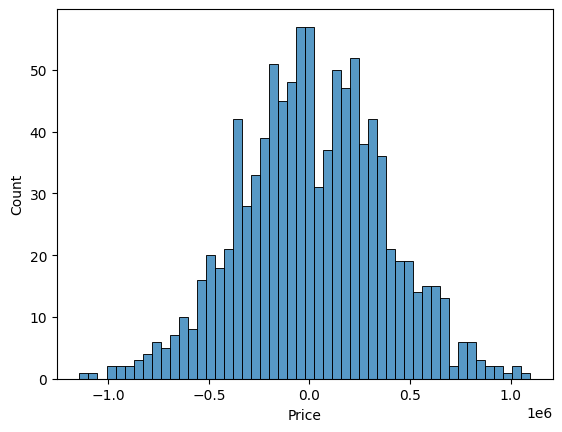

In [ ]:
sns.histplot((Y_test-Prediction2), bins=50)

In [ ]:
print(r2_score(Y_test, Prediction2))
print(mean_absolute_error(Y_test, Prediction2))
print(mean_squared_error(Y_test, Prediction2))

-0.000622217544275383
286137.8108616177
128209033246.16103


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor(n_estimators=50)

In [ ]:
model_rf.fit(X_train_scal, Y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
Prediction4 = model_rf.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

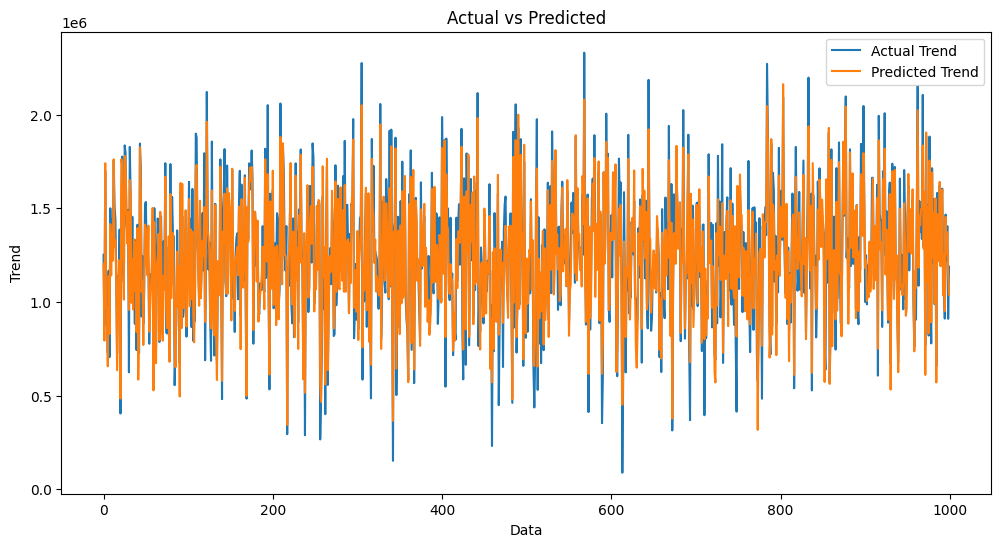

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
plt.plot(np.arange(len(Y_test)), Prediction4, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

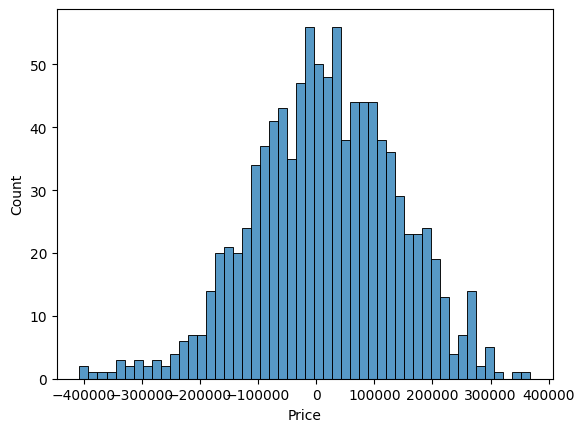

In [ ]:
sns.histplot((Y_test-Prediction4), bins=50)

In [ ]:
print(r2_score(Y_test, Prediction4))
print(mean_absolute_error(Y_test, Prediction4))
print(mean_squared_error(Y_test, Prediction4))

0.8785992367029718
99585.8014007088
15554995906.303984


In [ ]:
import xgboost as xg

In [ ]:
model_xg = xg.XGBRegressor()

In [ ]:
model_xg.fit(X_train_scal, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Prediction5 = model_xg.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

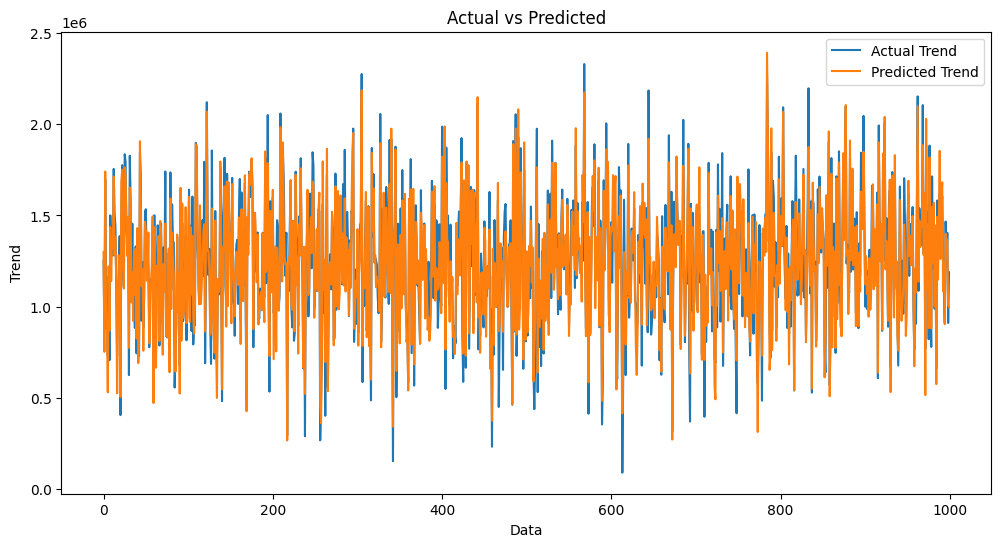

In [ ]:
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction5, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

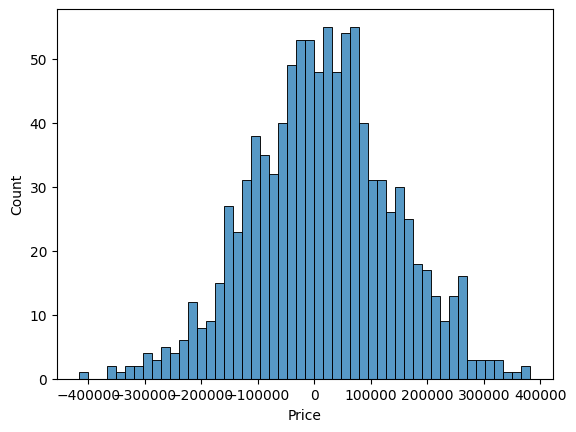

In [ ]:
sns.histplot((Y_test-Prediction5), bins=50)

In [ ]:
print(r2_score(Y_test, Prediction5))
print(mean_absolute_error(Y_test, Prediction5))
print(mean_squared_error(Y_test, Prediction5))

0.8749027860724268
100138.43696774
16028619571.134682


In [ ]:
Linear Regression is giving us best Accuracy.